In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Effect of excluding high-uncertainty variants on VEFill imputation performance

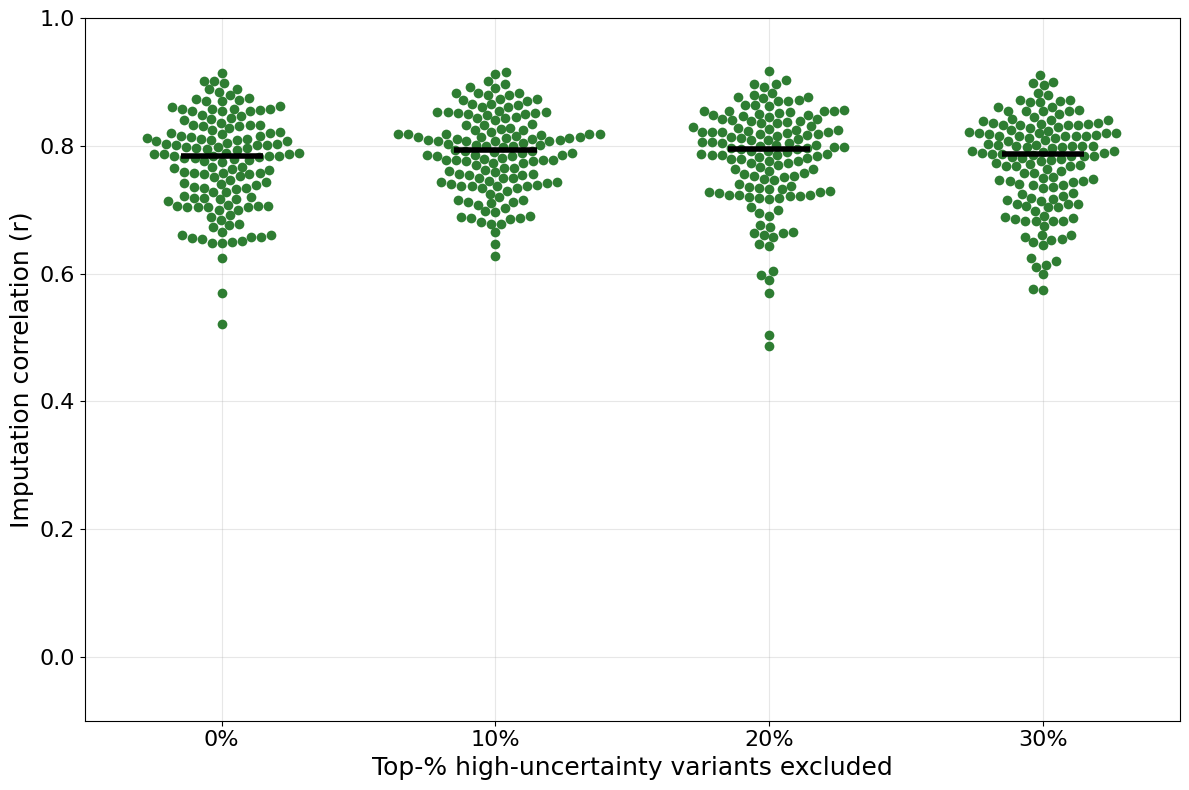

In [ ]:
# ----------------------------------------------------------
# Load benchmarking results
# ----------------------------------------------------------
# The input file contains VEFill performance evaluated after
# excluding increasing fractions of high-uncertainty variants.
df = pd.read_csv("performance_sigma_exclusion.csv")

# Ensure numeric ordering of exclusion thresholds
df["cut_percent"] = df["cut_percent"].astype(float)

# Define plotting order and human-readable labels
order = [0.0, 0.1, 0.2, 0.3]
xtick_labels = ["0%", "10%", "20%", "30%"]

# ----------------------------------------------------------
# Plot: effect of uncertainty-based filtering on performance
# ----------------------------------------------------------
plt.figure(figsize=(12, 8))

# Individual dataset performance values
sns.swarmplot(
    data=df,
    x="cut_percent",
    y="test_r",
    order=order,
    size=7,
    color="#2e7d32",   # dark green
    zorder=2
)

# Median performance per exclusion level
sns.boxplot(
    data=df,
    x="cut_percent",
    y="test_r",
    order=order,
    showcaps=False,
    showbox=False,
    showfliers=False,
    whiskerprops={"visible": False},
    medianprops={"color": "black", "lw": 4},
    width=0.3,
    zorder=5
)

# Axis labels and formatting
plt.xlabel("Top-% high-uncertainty variants excluded", fontsize=18)
plt.ylabel("Imputation correlation (Pearson r)", fontsize=18)

plt.xticks(ticks=range(len(order)), labels=xtick_labels, fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(-0.1, 1.0)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
